In [2]:
import sys
sys.path.insert(1, '../functions')
from gk import gk
from mwrko import mwrko
from gko import gko
from method import method
from method2 import method2
from compute_sin2 import compute_sin2
import math 

In [3]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from itertools import permutations

# Convergence Rate

#### GK

$$||x_k - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{m} \right) ^k ||x_0 - x^*||^2$$ or
$$||x_k - x^*||^2 \leq \Pi^{k-1}_{j = 0} \left ( 1 - \frac{\sigma^2_\min (A)}{\gamma_{k+1}} \right) ||x_0 - x^*||^2$$ where $\gamma_{k+1} = \frac{||Ax_{k+1}-b||^2}{||Ax_{k+1}-b||^2_{\infty}}$. In this experiment, we are using first convergence rate for GK.

#### GKO and MWRKO

For k = 1: $$||x_1 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{m} \right) ||x_0 - x^*||^2$$

For k = 2: $$||x_2 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{ ( \max_i \sin^2\theta_i )(m-1)} \right)||x_1 - x^*||^2$$

For k > 2:

**GKO:** $$||x_{k+1} - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{\max_i \sin^2\theta_i} \right)||x_k - x^*||^2$$

**MWRKO:** $$||x_2 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{ ( \max_i \sin^2\theta_i )(m-2)} \right) ||x_k - x^*||^2$$

## Gaussian System

In [4]:
# setting up data
A = np.random.randn(5000,500)
A = normalize(A, axis=1, norm='l2')
m,n = A.shape
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [5]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [6]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [7]:
# Run algorithms
gk_gaussian = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gaussian = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gaussian = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

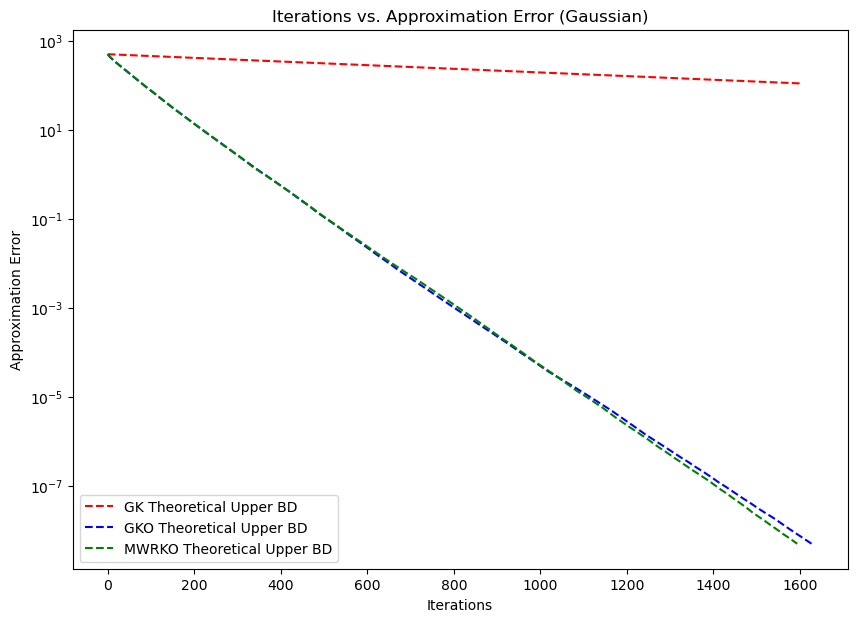

In [8]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gaussian[2])), gk_gaussian[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gaussian[2])), gko_gaussian[2], linestyle = 'dashed', 
            color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gaussian[2])), mwrko_gaussian[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
#plt.semilogy(np.arange(gk_gaussian[0] - 1), gk_gaussian[1], color = "red", linestyle = 'solid', label = 'GK')
#plt.semilogy(np.arange(gko_gaussian[0] - 1), gko_gaussian[1], linestyle = 'solid', color = "blue", label = 'GKO')
#plt.semilogy(np.arange(mwrko_gaussian[0] - 1), mwrko_gaussian[1], linestyle = 'solid', color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian)')
plt.legend()

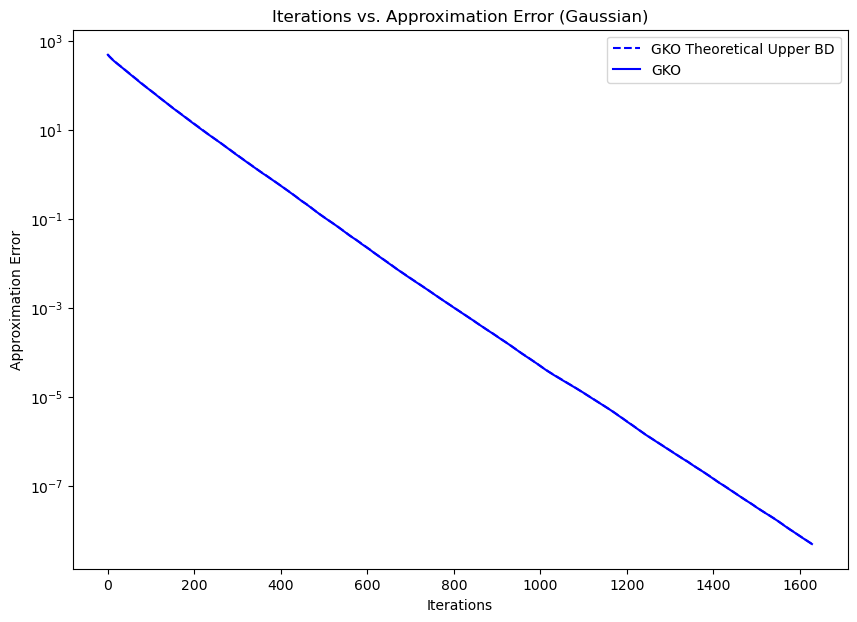

In [14]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gko_gaussian[2])), gko_gaussian[2], linestyle = 'dashed', 
            color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(gko_gaussian[0] - 1), gko_gaussian[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')

# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian)')
plt.legend()

In [15]:
i=0
for n in range(gko_gaussian[0]):
    if gko_gaussian[2] > gko_gaussian[1]:
        i+=1

gko_gaussian[0] == i

True

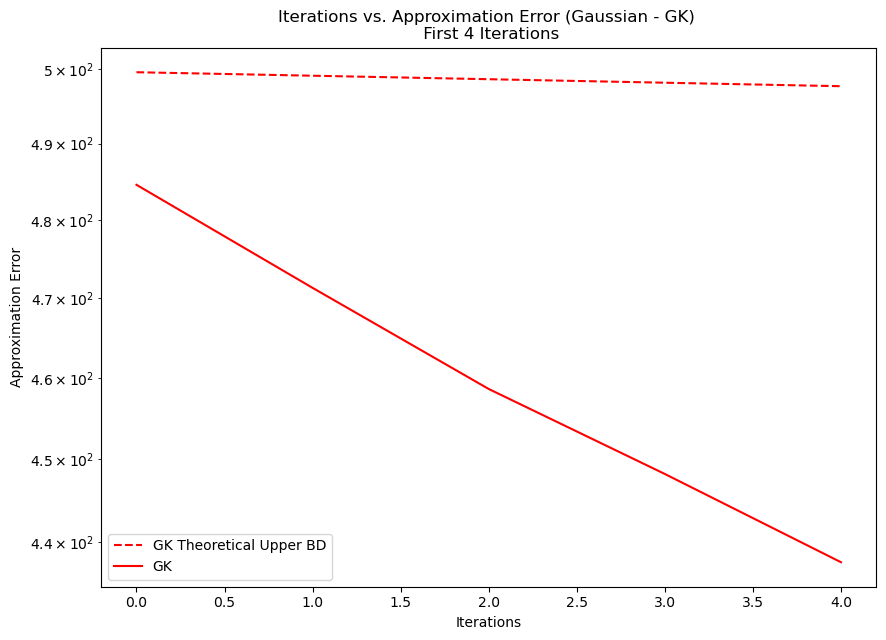

In [16]:
# Show GK empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gk_gaussian[2][0:5], linestyle = 'dashed', 
             color = "red", label = 'GK Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gk_gaussian[1][0:5], linestyle = 'solid', 
             color = "red", label = 'GK')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - GK) \n First 4 Iterations')
plt.legend()

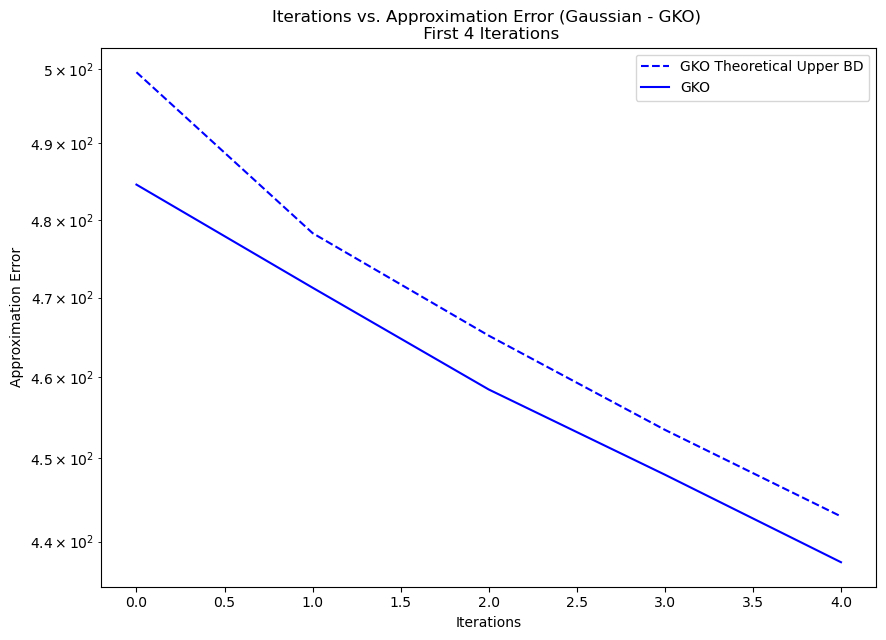

In [17]:
# Show GKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gko_gaussian[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gko_gaussian[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - GKO) \n First 4 Iterations')
plt.legend()

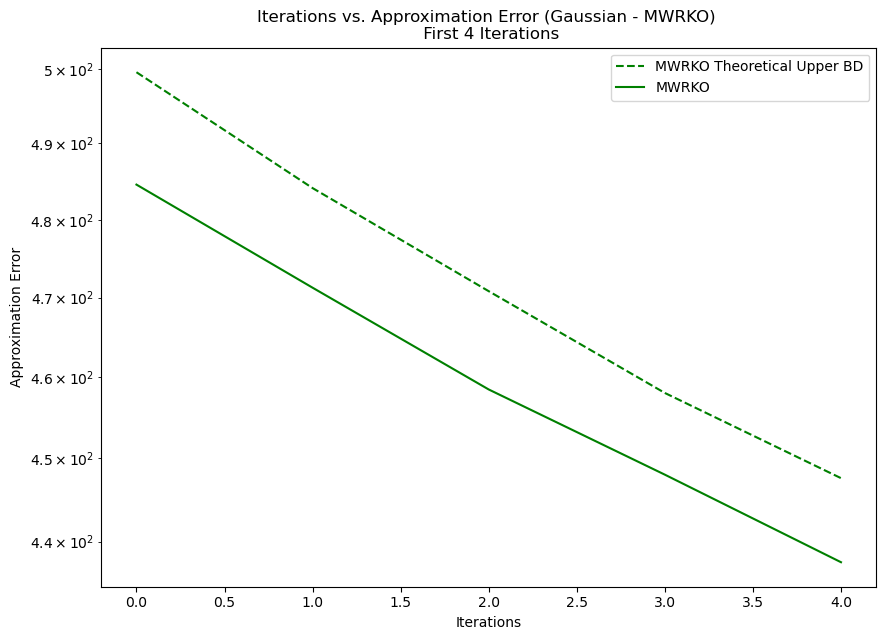

In [18]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gaussian[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gaussian[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - MWRKO) \n First 4 Iterations')
plt.legend()

In [19]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gaussian[0]-9), mwrko_gaussian[0]+1)))
# empirical result data
e_result = list(mwrko_gaussian[1][0:10])
e_result.extend(list(mwrko_gaussian[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gaussian[2][0:10])
t_result.extend(list(mwrko_gaussian[2][-11:-1]))
# create and print df
mwrko_gauss_df = pd.DataFrame()
mwrko_gauss_df['k'] = k
mwrko_gauss_df['Theoretical BD'] = t_result
mwrko_gauss_df['Empirical Results'] = e_result
mwrko_gauss_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.587000e+03,1.588000e+03,1.589000e+03,1.590000e+03,1.591000e+03,1.592000e+03,1.593000e+03,1.594000e+03,1.595000e+03,1.596000e+03
Theoretical BD,499.528515,484.123265,470.816785,458.040216,447.612021,437.141996,427.800972,418.322721,409.272239,400.185213,5.860571e-09,5.773062e-09,5.683743e-09,5.603098e-09,5.519042e-09,5.420105e-09,5.333398e-09,5.253897e-09,5.174172e-09,5.098813e-09
Empirical Results,484.580301,471.261349,458.472716,448.034674,437.554763,428.204919,418.717717,409.658690,400.563084,391.239373,5.778513e-09,5.689109e-09,5.608388e-09,5.524253e-09,5.425223e-09,5.338434e-09,5.258858e-09,5.179058e-09,5.103627e-09,5.023264e-09


## Uniform System

In [20]:
# setting up data
A = np.random.uniform(size =(5000,500), low = 0, high = 1)
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [21]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [22]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [23]:
# Run algorithms
gk_uniform = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_uniform = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_uniform = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

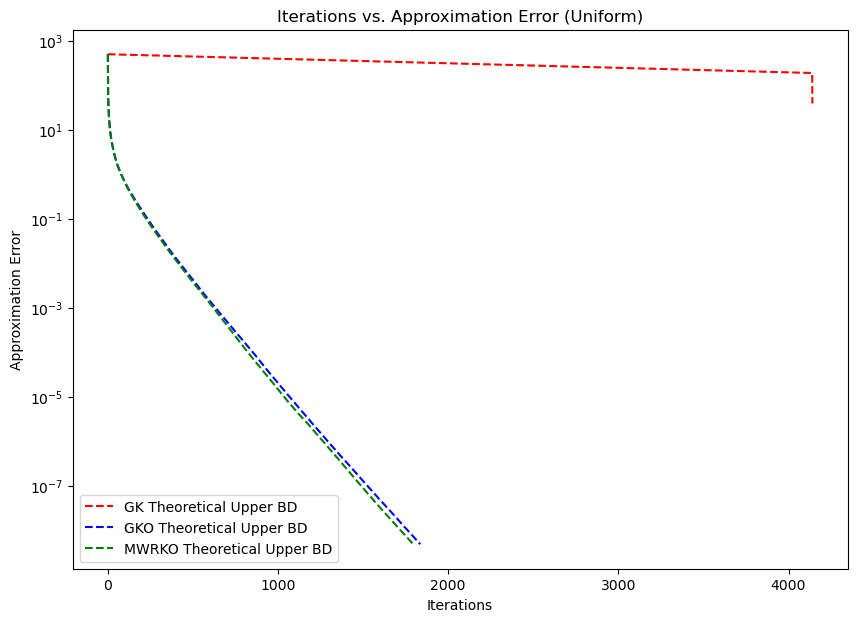

In [24]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_uniform[2])), gk_uniform[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_uniform[2])), gko_uniform[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_uniform[2])), mwrko_uniform[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
#plt.semilogy(np.arange(gk_uniform[0] - 1), gk_uniform[1], 
#             color = "red", linestyle = 'solid', label = 'GK')
#plt.semilogy(np.arange(gko_uniform[0] - 1), gko_uniform[1], linestyle = 'solid', 
#             color = "blue", label = 'GKO')
#plt.semilogy(np.arange(mwrko_uniform[0] - 1), mwrko_uniform[1], linestyle = 'solid', 
#             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform)')
plt.legend()

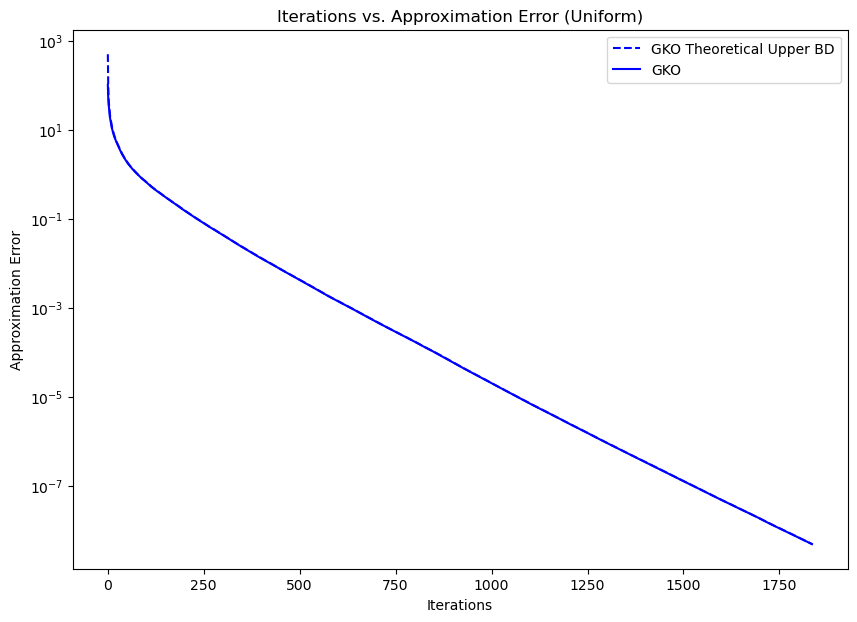

In [25]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gko_uniform[2])), gko_uniform[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(gko_uniform[0] - 1), gko_uniform[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform)')
plt.legend()

In [26]:
i=0
for n in range(gko_uniform[0]):
    if gko_uniform[2] > gko_uniform[1]:
        i+=1

gko_uniform[0] == i

True

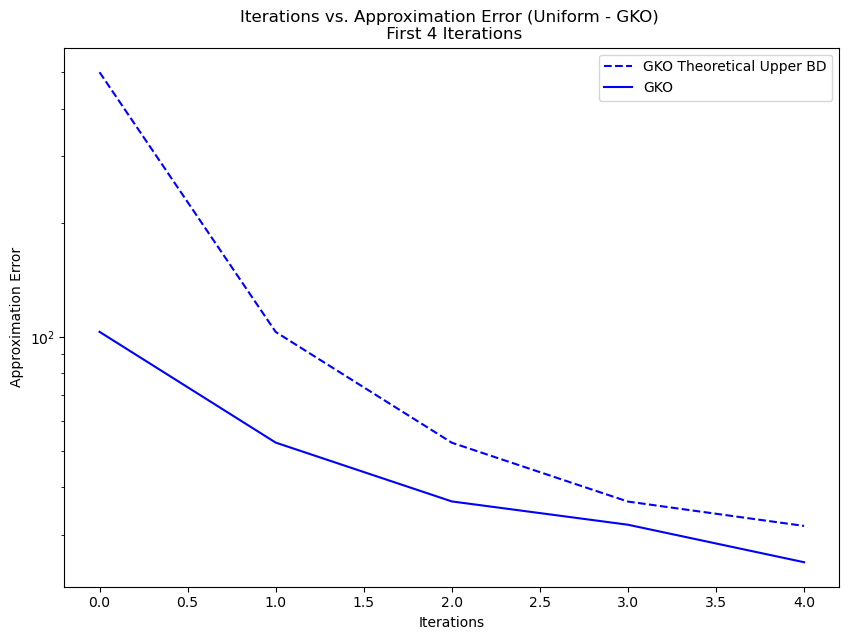

In [27]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gko_uniform[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gko_uniform[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform - GKO) \n First 4 Iterations')
plt.legend()

In [28]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_uniform[0]-9), mwrko_uniform[0]+1)))
# empirical result data
e_result = list(mwrko_uniform[1][0:10])
e_result.extend(list(mwrko_uniform[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_uniform[2][0:10])
t_result.extend(list(mwrko_uniform[2][-11:-1]))
# create and print df
mwrko_uniform_df = pd.DataFrame()
mwrko_uniform_df['k'] = k
mwrko_uniform_df['Theoretical BD'] = t_result
mwrko_uniform_df['Empirical Results'] = e_result
mwrko_uniform_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.785000e+03,1.786000e+03,1.787000e+03,1.788000e+03,1.789000e+03,1.790000e+03,1.791000e+03,1.792000e+03,1.793000e+03,1.794000e+03
Theoretical BD,499.882769,103.017253,52.521540,36.722568,31.953112,25.476810,20.116402,18.305730,16.133272,14.181505,5.583305e-09,5.524584e-09,5.467942e-09,5.415518e-09,5.360582e-09,5.307716e-09,5.255686e-09,5.201057e-09,5.143359e-09,5.090031e-09
Empirical Results,103.061247,52.543974,36.738253,31.966761,25.487692,20.124995,18.313549,16.140163,14.187562,12.719537,5.526943e-09,5.470278e-09,5.417831e-09,5.362872e-09,5.309983e-09,5.257931e-09,5.203279e-09,5.145556e-09,5.092206e-09,5.034518e-09


## 50/50 Gauss-Uniform System

In [29]:
# setting up data
A1 = np.random.rand(2500,500)
A2 = np.random.randn(2500,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [30]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [31]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [32]:
# Run algorithms
gk_gu1 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu1 = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu1 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

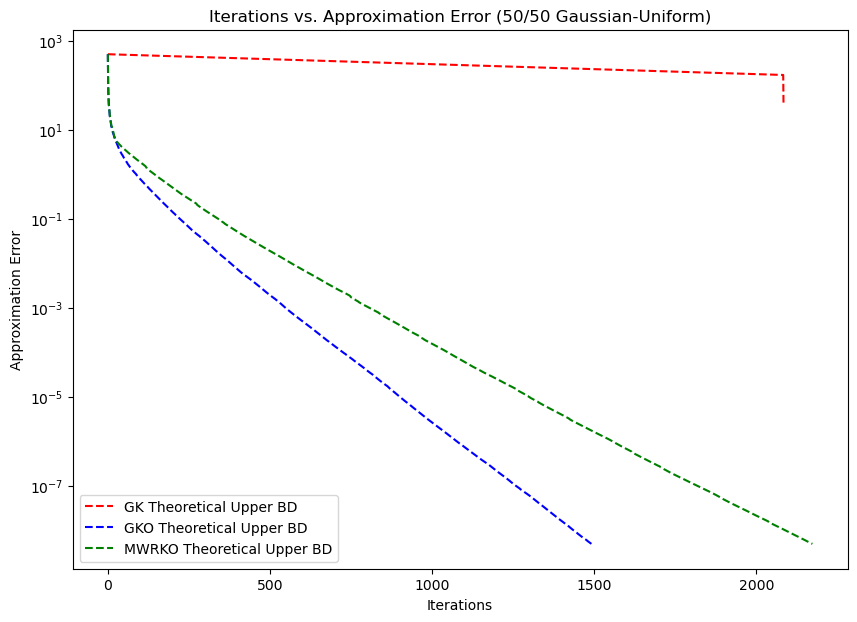

In [35]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu1[2])), gk_gu1[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu1[2])), gko_gu1[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu1[2])), mwrko_gu1[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
#plt.semilogy(np.arange(gk_gu1[0] - 1), gk_gu1[1], 
#             color = "red", linestyle = 'solid', label = 'GK')
#plt.semilogy(np.arange(gko_gu1[0] - 1), gko_gu1[1], linestyle = 'solid', 
#             color = "blue", label = 'GKO')
#plt.semilogy(np.arange(mwrko_gu1[0] - 1), mwrko_gu1[1], linestyle = 'solid', 
#             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gaussian-Uniform)')
plt.legend()

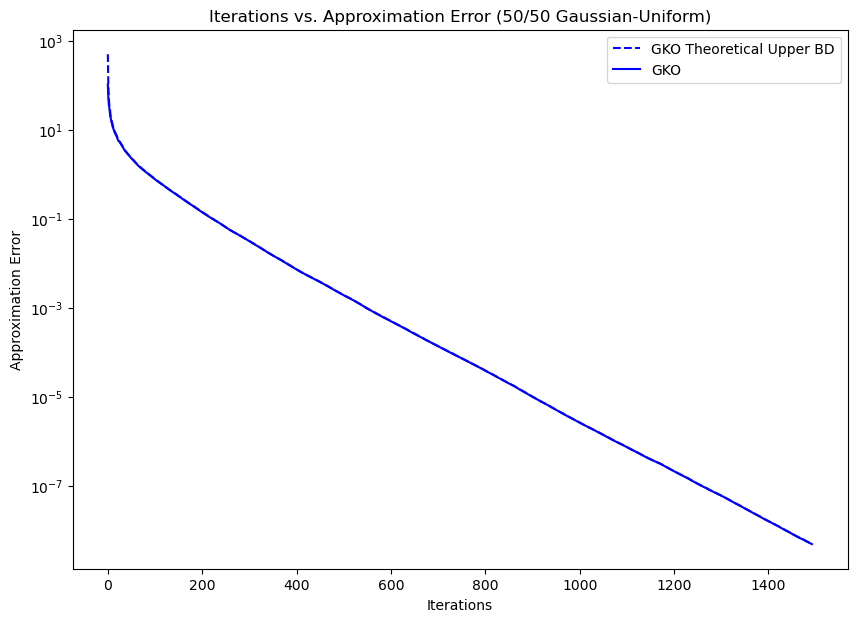

In [36]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gko_gu1[2])), gko_gu1[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(gko_gu1[0] - 1), gko_gu1[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gaussian-Uniform)')
plt.legend()

In [37]:
i=0
for n in range(gko_gu1[0]):
    if gko_gu1[2] > gko_gu1[1]:
        i+=1

gko_gu1[0] == i

True

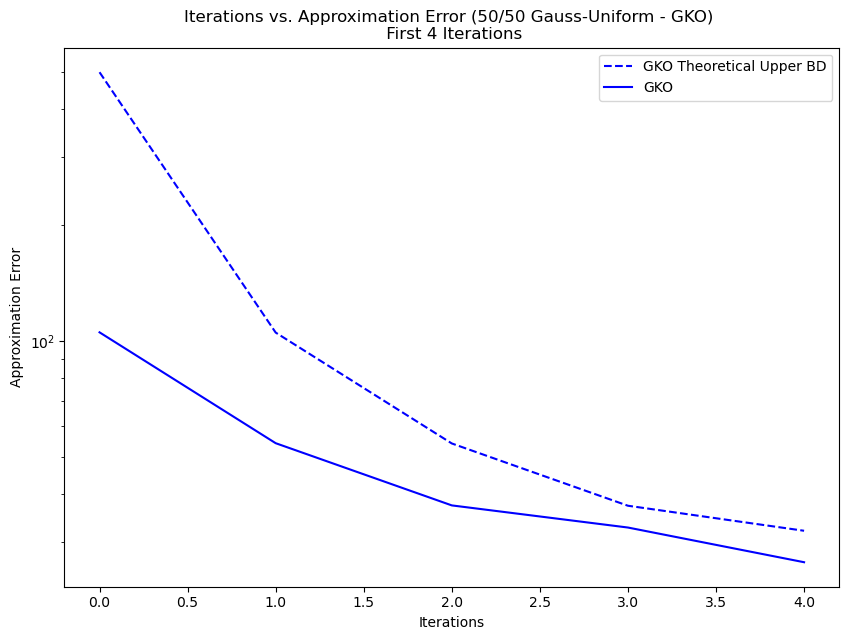

In [38]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gko_gu1[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu1[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gauss-Uniform - GKO) \n First 4 Iterations')
plt.legend()

In [39]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu1[0]-9), mwrko_gu1[0]+1)))
# empirical result data
e_result = list(mwrko_gu1[1][0:10])
e_result.extend(list(mwrko_gu1[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu1[2][0:10])
t_result.extend(list(mwrko_gu1[2][-11:-1]))
# create and print df
mwrko_gu1_df = pd.DataFrame()
mwrko_gu1_df['k'] = k
mwrko_gu1_df['Theoretical BD'] = t_result
mwrko_gu1_df['Empirical Results'] = e_result
mwrko_gu1_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,2.166000e+03,2.167000e+03,2.168000e+03,2.169000e+03,2.170000e+03,2.171000e+03,2.172000e+03,2.173000e+03,2.174000e+03,2.175000e+03
Theoretical BD,499.742617,105.235703,54.190836,37.338323,32.704424,26.571076,21.536233,19.706318,17.704481,15.812667,5.436885e-09,5.394161e-09,5.353883e-09,5.315717e-09,5.271589e-09,5.228508e-09,5.188195e-09,5.148724e-09,5.109724e-09,5.068604e-09
Empirical Results,105.289913,54.218757,37.357561,32.721275,26.584766,21.547329,19.716472,17.713603,15.820814,13.990662,5.396940e-09,5.356641e-09,5.318455e-09,5.274306e-09,5.231202e-09,5.190868e-09,5.151377e-09,5.112356e-09,5.071216e-09,5.028380e-09


## 75/25 Gauss-Uniform System

In [40]:
# setting up data
A1 = np.random.rand(1250,500)
A2 = np.random.randn(3750,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [41]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [42]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [43]:
# Run algorithms
gk_gu2 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu2 = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu2 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

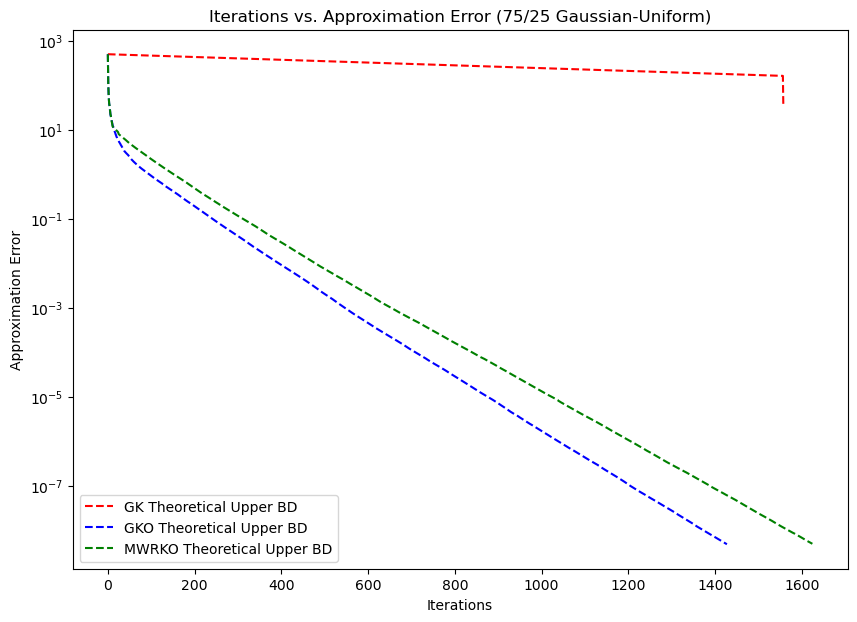

In [44]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu2[2])), gk_gu2[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu2[2])), gko_gu2[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu2[2])), mwrko_gu2[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
#plt.semilogy(np.arange(gk_gu2[0] - 1), gk_gu2[1], 
#             color = "red", linestyle = 'solid', label = 'GK')
#plt.semilogy(np.arange(gko_gu2[0] - 1), gko_gu2[1], linestyle = 'solid', 
#             color = "blue", label = 'GKO')
#plt.semilogy(np.arange(mwrko_gu2[0] - 1), mwrko_gu2[1], linestyle = 'solid', 
#             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gaussian-Uniform)')
plt.legend()

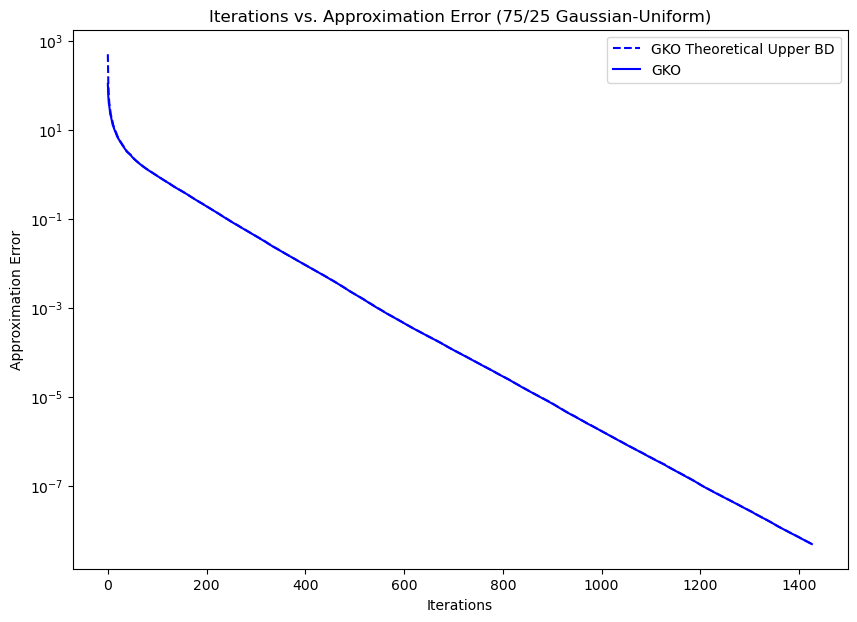

In [45]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gko_gu2[2])), gko_gu2[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(gko_gu2[0] - 1), gko_gu2[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gaussian-Uniform)')
plt.legend()

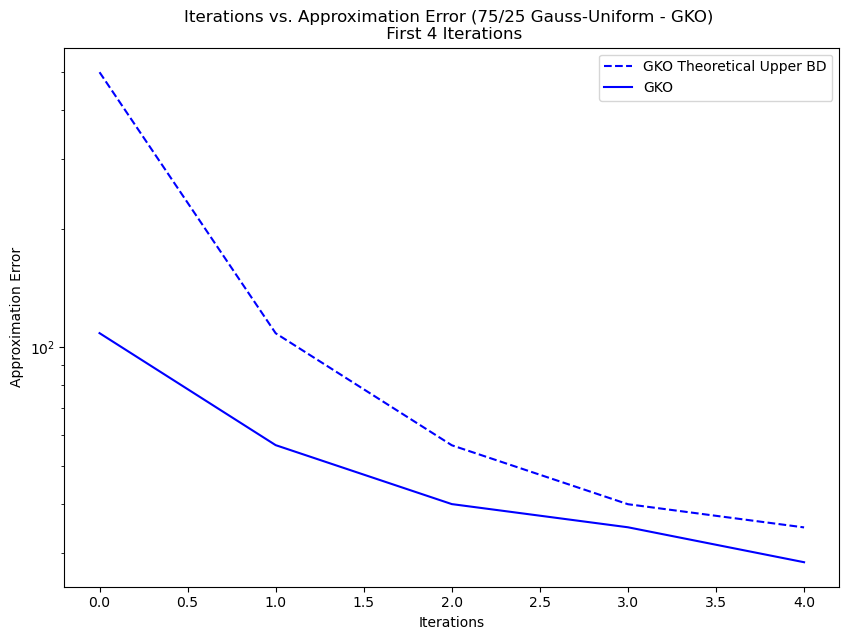

In [46]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu2[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu2[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gauss-Uniform - GKO) \n First 4 Iterations')
plt.legend()

In [47]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu2[0]-9), mwrko_gu2[0]+1)))
# empirical result data
e_result = list(mwrko_gu2[1][0:10])
e_result.extend(list(mwrko_gu2[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu2[2][0:10])
t_result.extend(list(mwrko_gu2[2][-11:-1]))
# create and print df
mwrko_gu2_df = pd.DataFrame()
mwrko_gu2_df['k'] = k
mwrko_gu2_df['Theoretical BD'] = t_result
mwrko_gu2_df['Empirical Results'] = e_result
mwrko_gu2_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.00000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.617000e+03,1.618000e+03,1.619000e+03,1.620000e+03,1.621000e+03,1.622000e+03,1.623000e+03,1.624000e+03,1.625000e+03,1.626000e+03
Theoretical BD,499.640179,108.523234,56.362245,39.92472,34.861344,28.417217,22.547599,20.412095,17.535305,15.243627,5.705648e-09,5.620383e-09,5.553145e-09,5.477761e-09,5.411561e-09,5.346591e-09,5.281522e-09,5.218816e-09,5.158309e-09,5.101322e-09
Empirical Results,108.601404,56.402852,39.953484,34.88646,28.437690,22.563843,20.426800,17.547938,15.254609,13.825885,5.624432e-09,5.557146e-09,5.481707e-09,5.415459e-09,5.350443e-09,5.285327e-09,5.222576e-09,5.162025e-09,5.104997e-09,5.043742e-09


## 25/75 Gauss-Uniform System

In [48]:
# setting up data
A1 = np.random.rand(3750,500)
A2 = np.random.randn(1250,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [49]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [50]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [51]:
# Run algorithms
gk_gu3 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu3 = method2(A,x,y,'GKO', LHk_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu3 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

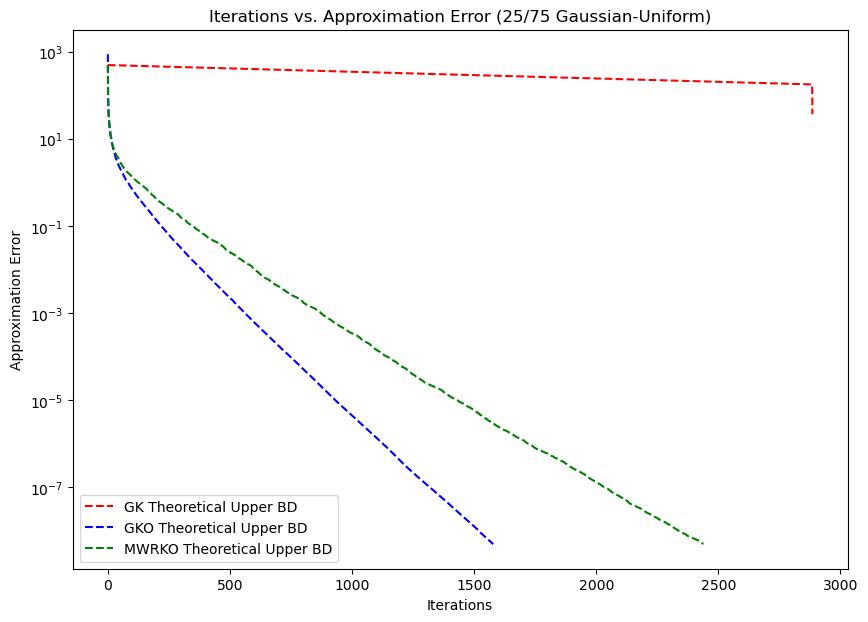

In [52]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu3[2])), gk_gu3[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu3[2])), gko_gu3[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu3[2])), mwrko_gu3[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
#plt.semilogy(np.arange(gk_gu3[0] - 1), gk_gu3[1], 
#             color = "red", linestyle = 'solid', label = 'GK')
#plt.semilogy(np.arange(gko_gu3[0] - 1), gko_gu3[1], linestyle = 'solid', 
#             color = "blue", label = 'GKO')
#plt.semilogy(np.arange(mwrko_gu3[0] - 1), mwrko_gu3[1], linestyle = 'solid', 
#             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gaussian-Uniform)')
plt.legend()

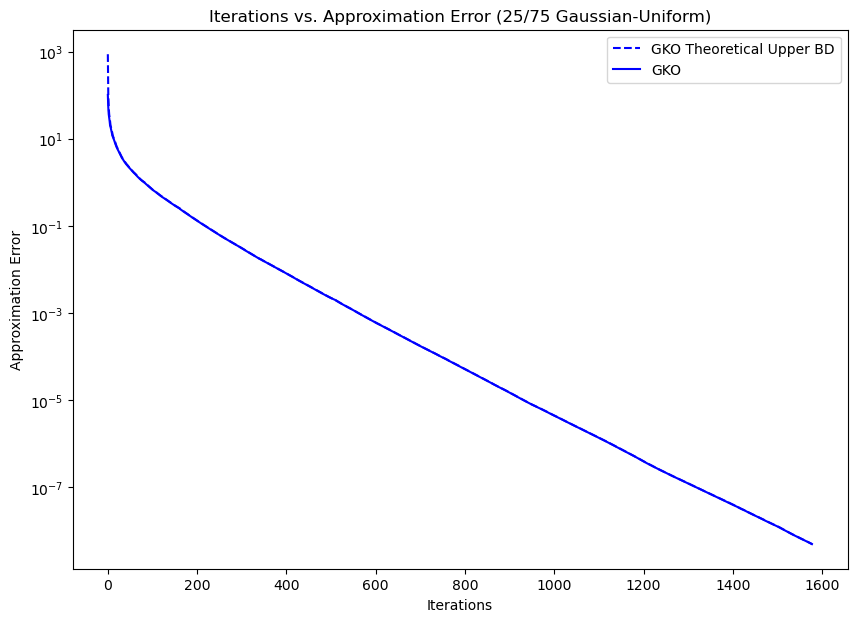

In [53]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gko_gu3[2])), gko_gu3[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(gko_gu3[0] - 1), gko_gu3[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gaussian-Uniform)')
plt.legend()

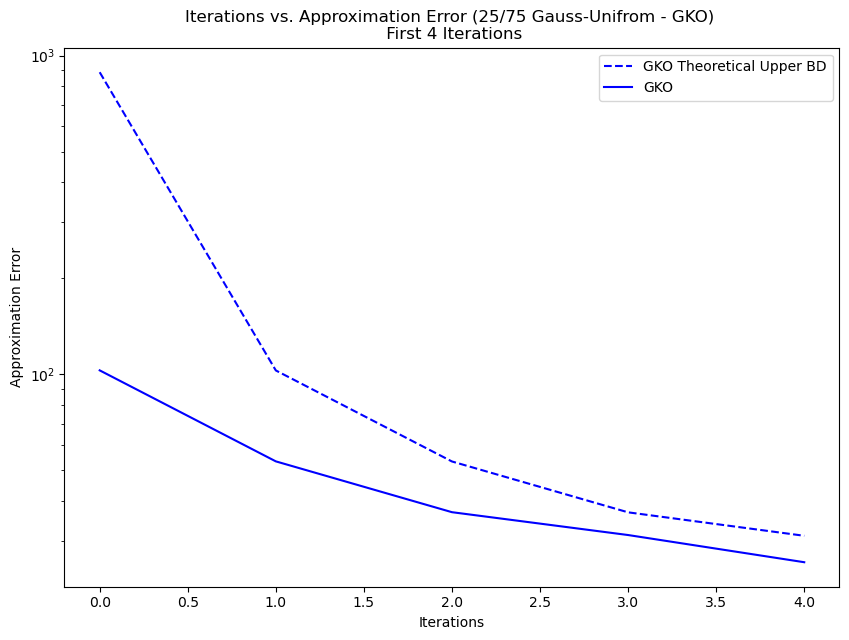

In [54]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gko_gu3[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gko_gu3[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gauss-Unifrom - GKO) \n First 4 Iterations')
plt.legend()

In [55]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu3[0]-9), mwrko_gu3[0]+1)))
# empirical result data
e_result = list(mwrko_gu3[1][0:10])
e_result.extend(list(mwrko_gu3[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu3[2][0:10])
t_result.extend(list(mwrko_gu3[2][-11:-1]))
# create and print df
mwrko_gu3_df = pd.DataFrame()
mwrko_gu3_df['k'] = k
mwrko_gu3_df['Theoretical BD'] = t_result
mwrko_gu3_df['Empirical Results'] = e_result
mwrko_gu3_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,2.432000e+03,2.433000e+03,2.434000e+03,2.435000e+03,2.436000e+03,2.437000e+03,2.438000e+03,2.439000e+03,2.440000e+03,2.441000e+03
Theoretical BD,499.822661,102.913055,53.334661,36.949516,31.489857,26.100569,21.221573,19.272572,17.263728,15.505326,5.509173e-09,5.416195e-09,5.379852e-09,5.299776e-09,5.227649e-09,5.156669e-09,5.127198e-09,5.098566e-09,5.071067e-09,5.042495e-09
Empirical Results,102.949576,53.353592,36.962631,31.501034,26.109833,21.229106,19.279413,17.269856,15.510830,13.912132,5.418117e-09,5.381761e-09,5.301657e-09,5.229505e-09,5.158499e-09,5.129018e-09,5.100376e-09,5.072867e-09,5.044285e-09,5.018814e-09


## Two Highly Correlated Systems

In [56]:
# setting up data
# Step 1: generate two gaussian linear system
A = np.random.randn(2,500)
A1 = np.reshape(A[0,:], (1, 500))
A2 = np.reshape(A[1,:], (1, 500))
# Step 2: generate correalted systems
U = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A1 =  np.tile(A1, (2500, 1)) +  U
A2 =  np.tile(A2, (2500, 1)) +  U
# Step 3: Combine two correlated systems
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [57]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [58]:
# Run algorithms
gk_corr = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_corr = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_corr = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

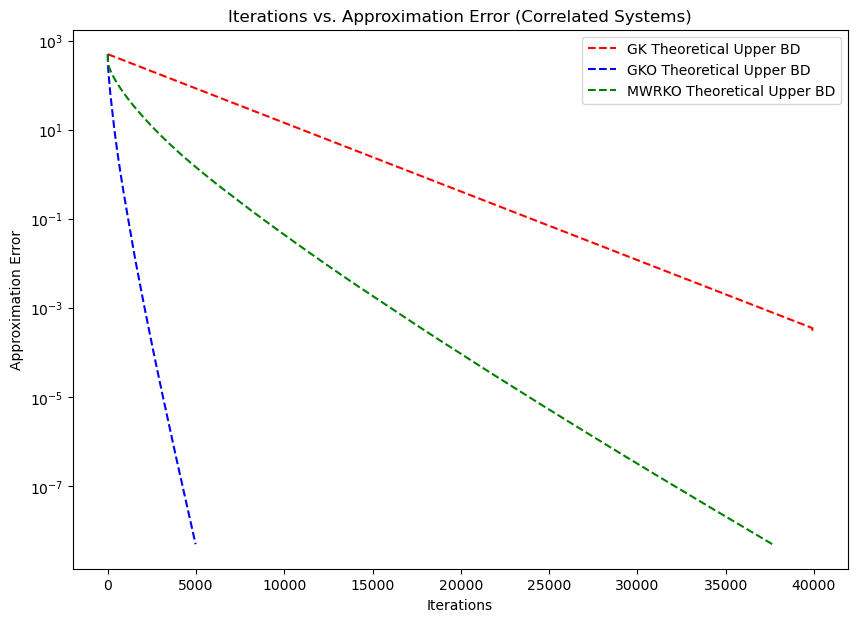

In [59]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_corr[2])), gk_corr[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_corr[2])), gko_corr[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_corr[2])), mwrko_corr[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
#plt.semilogy(np.arange(gk_corr[0] - 1), gk_corr[1], 
#             color = "red", linestyle = 'solid', label = 'GK')
#plt.semilogy(np.arange(gko_corr[0] - 1), gko_corr[1], linestyle = 'solid', 
#             color = "blue", label = 'GKO')
#plt.semilogy(np.arange(mwrko_corr[0] - 1), mwrko_corr[1], linestyle = 'solid', 
#             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems)')
plt.legend()

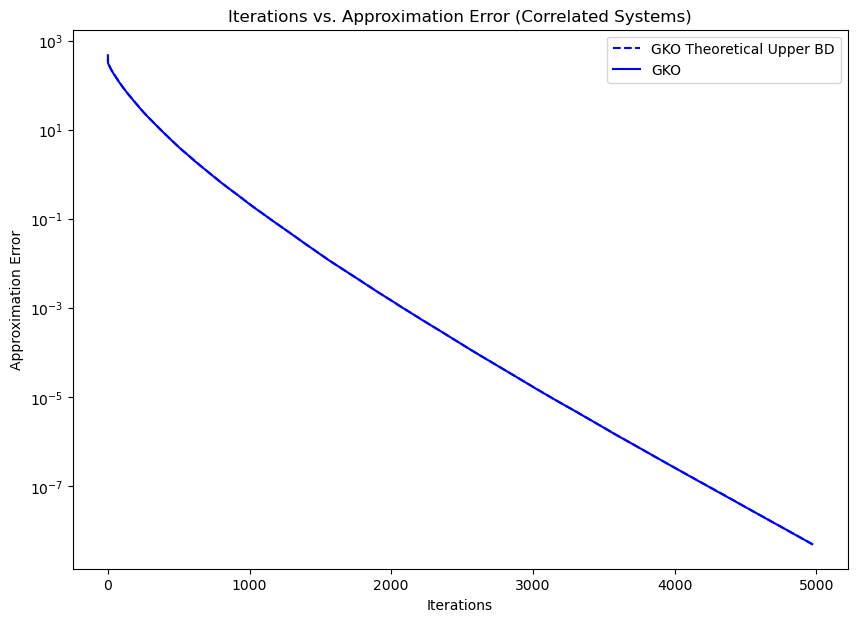

In [60]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gko_corr[2])), gko_corr[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(gko_corr[0] - 1), gko_corr[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems)')
plt.legend()

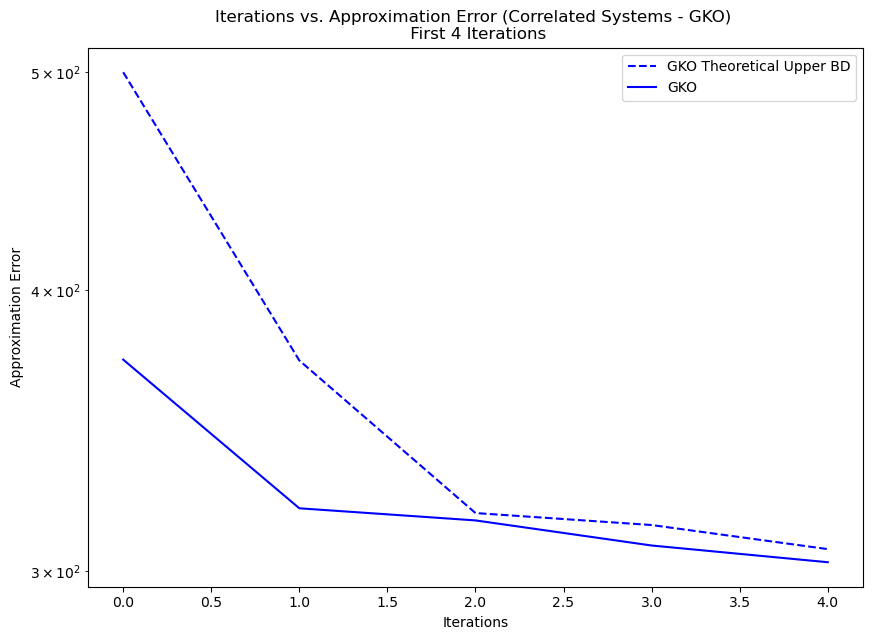

In [61]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gko_corr[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gko_corr[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems - GKO) \n First 4 Iterations')
plt.legend()

In [62]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_corr[0]-9), mwrko_corr[0]+1)))
# empirical result data
e_result = list(mwrko_corr[1][0:10])
e_result.extend(list(mwrko_corr[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_corr[2][0:10])
t_result.extend(list(mwrko_corr[2][-11:-1]))
# create and print df
mwrko_corr_df = pd.DataFrame()
mwrko_corr_df['k'] = k
mwrko_corr_df['Theoretical BD'] = t_result
mwrko_corr_df['Empirical Results'] = e_result
mwrko_corr_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,3.763200e+04,3.763300e+04,3.763400e+04,3.763500e+04,3.763600e+04,3.763700e+04,3.763800e+04,3.763900e+04,3.764000e+04,3.764100e+04
Theoretical BD,499.822661,372.342507,319.793637,318.857461,317.112222,315.599290,314.100818,312.732416,311.452141,310.198077,5.026726e-09,5.023991e-09,5.021257e-09,5.018512e-09,5.015752e-09,5.012984e-09,5.010263e-09,5.007582e-09,5.004885e-09,5.002182e-09
Empirical Results,372.474642,319.907146,318.970638,317.224779,315.711311,314.212307,312.843420,311.562689,310.308181,309.096970,5.025775e-09,5.023040e-09,5.020293e-09,5.017532e-09,5.014763e-09,5.012041e-09,5.009360e-09,5.006661e-09,5.003957e-09,5.001281e-09
